# Определение перспективного тарифа для телеком-компании

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1.Файл с данными и изучение общей информации

In [255]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np

Сохраним таблицы-csv в переменные и узнаем о ней информацию

In [256]:
data_calls=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Рабочий стол\\Проект. Определение перспективного тарифа для телеком-компании\\calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [257]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [258]:
data_internet=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Рабочий стол\\Проект. Определение перспективного тарифа для телеком-компании\\internet.csv')
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [259]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [260]:
data_messages=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Рабочий стол\\Проект. Определение перспективного тарифа для телеком-компании\\messages.csv')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [261]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [262]:
data_tariffs=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Рабочий стол\\Проект. Определение перспективного тарифа для телеком-компании\\tariffs.csv')
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [263]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [264]:
data_users=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Рабочий стол\\Проект. Определение перспективного тарифа для телеком-компании\\users.csv')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [265]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### 1.1  Вывод

Согласно документации к данным:
Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана
Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок
Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропуски присутствуют в таблице data_users в колонке churn_date.

## 2.Предобработка данных

In [266]:
#Удалим столбец в таблице data_internet
data_internet=data_internet.drop('Unnamed: 0',axis=1)
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


По правилу: каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [267]:
#перевод длительность звонка в таблице calls в тип int
data_calls['duration']=[data_calls['duration'][i]+1 if data_calls['duration'][i]!=0 else 0 for i in range(len(data_calls['duration']))]
data_calls['duration']=data_calls['duration'].astype('int')

In [268]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


По правилу "Мегалайн" округляет мегабайты в гигабайты

In [269]:
data_internet['gb_used']=[data_internet['mb_used'][i]//1024 + 1 if data_internet['mb_used'][i]!=0 else 0 for i in range(len(data_internet['mb_used']))]
data_internet.head()

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,1.0
1,1000_1,1052.81,2018-09-07,1000,2.0
2,1000_2,1197.26,2018-06-25,1000,2.0
3,1000_3,550.27,2018-08-22,1000,1.0
4,1000_4,302.56,2018-09-24,1000,1.0


In [270]:
data_internet['gb_used']=data_internet['gb_used'].astype('int')
data_internet.head()

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,1
1,1000_1,1052.81,2018-09-07,1000,2
2,1000_2,1197.26,2018-06-25,1000,2
3,1000_3,550.27,2018-08-22,1000,1
4,1000_4,302.56,2018-09-24,1000,1


Тип во всех остальных данных указан верно.

Пропуски присутствуют в таблице data_users в колонке churn_date. Их следует оставить, т.к. они будут указывать, что тариф у пользователя еще действует.

In [271]:
data_calls['call_date']

0         2018-07-25
1         2018-08-17
2         2018-06-11
3         2018-09-21
4         2018-12-15
             ...    
202602    2018-12-26
202603    2018-10-18
202604    2018-11-10
202605    2018-10-06
202606    2018-12-14
Name: call_date, Length: 202607, dtype: object

In [272]:
#изменим тип даты в таблице call_date
data_calls['call_date']=data_calls['call_date'].astype('datetime64')

In [273]:
#добавим номер месяц в таблицу data_calls к каждой строке
data_calls['month']=data_calls['call_date'].dt.month
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [274]:
#таблица с количеством сделанных звонков по месяцам для каждого пользователя
calls_user_month=pd.pivot_table(data_calls,index='user_id',columns='month',aggfunc='count')
calls_user_month['call_date']

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,112.0,152.0,129.0,155.0
1496,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,64.0,71.0


In [275]:
#таблица израсходованных минут разговора по месяцам для каждого пользователя
minutes_user_month=pd.pivot_table(data_calls,values='duration',index='user_id',columns='month',aggfunc='sum')
minutes_user_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,409.0,467.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,291.0,207.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,856.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,146.0,118.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,816.0,1031.0,955.0,1034.0
1496,48.0,595.0,557.0,523.0,485.0,555.0,582.0,527.0,486.0,451.0,663.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0


In [276]:
#изменим тип даты в таблице call_date
data_messages['message_date']=data_messages['message_date'].astype('datetime64')

In [277]:
#добавим номер месяц в таблицу data_messages к каждой строке
data_messages['month']=data_messages['message_date'].dt.month

In [278]:
#количество отправленных сообщений по месяцам
message_user_month=pd.pivot_table(data_messages,index='user_id',columns='month',aggfunc='count')
message_user_month['id']

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,17.0


In [279]:
message_user_month['id'][1][1000]

nan

In [280]:
#изменение типа даты интернет-сессии в таблице data_internet
data_internet['session_date']=data_internet['session_date'].astype('datetime64')

In [281]:
#добавим номер месяц в таблицу data_internet к каждой строке
data_internet['month']=data_internet['session_date'].dt.month

In [282]:
#таблица объема израсходованного интернет-трафика по месяцам для каждого пользователя
volume_user_month=pd.pivot_table(data_internet,values='gb_used',index='user_id',columns='month',aggfunc='sum')
volume_user_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,4.0,49.0,28.0,27.0,26.0,28.0,27.0,19.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,35.0
1002,NaN,NaN,NaN,NaN,NaN,27.0,45.0,50.0,44.0,36.0,45.0,52.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,23.0,28.0,20.0,21.0
1004,NaN,NaN,NaN,NaN,26.0,35.0,36.0,53.0,32.0,37.0,34.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,69.0,58.0,73.0,47.0
1496,10.0,68.0,69.0,54.0,64.0,57.0,58.0,58.0,69.0,72.0,62.0,55.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,37.0,42.0


In [283]:
#функция подсчета выручки с пользователя для каждого тарифа
def money(tariff,calls,message,trafic):
    if tariff=='smart':
        if calls<=500:
            calls=500
        if message<=50:
            message=50
        if trafic<=15:
            trafic=15
        return (calls-500)*3 + (message-50)*3 + (trafic-15)*200 +550
    else:
        if calls<=3000:
            calls=3000
        if message<=1000:
            message=1000
        if trafic<=30:
            trafic=30
        return (calls-3000)*1 + (message-1000)*1 + (trafic-30)*150 +1950

In [284]:
#создание датафрейма таблицы помесяцчной выручки с каждого пользователя
data={}
data['user_id']=[]
for j in data_users['user_id']:
    data['user_id'].append(j)
for i in range(1,13):
    data[i]=[]
    for j in data_users['user_id']:
        if j in data_calls['user_id'].unique():
            calls=minutes_user_month[i][j]
            if calls>-1:
                calls=calls
            else:
                calls=0
        else:
            calls=0
        if j in data_messages['user_id'].unique():
            message=message_user_month['id'][i][j]
            if message>-1:
                message=message
            else:
                message=0
        else:
            message=0
        if j in data_internet['user_id'].unique():
            trafic=volume_user_month[i][j]
            if trafic>-1:
                trafic=trafic
            else:
                trafic=0
        else:
            trafic=0
        data[i].append(money(data_users['tariff'][j-1000],calls,message,trafic))
data['summary']=[]
for j in data_users['user_id']:
    summ=[]
    for i in range(1,13):
        summ.append(data[i][j-1000])
    data['summary'].append(sum(summ))

In [285]:
data_profit=pd.DataFrame(data)
data_profit.head()

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,summary
0,1000,1950.0,1950.0,1950.0,1950.0,1950.0,4800.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,26250.0
1,1001,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,6950.0,4550.0,17000.0
2,1002,550.0,550.0,550.0,550.0,550.0,2950.0,6550.0,7550.0,6350.0,4750.0,6550.0,7950.0,45400.0
3,1003,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,23400.0
4,1004,1950.0,1950.0,1950.0,1950.0,1950.0,2700.0,2850.0,5400.0,2250.0,3000.0,2550.0,3150.0,31650.0


### 2.1 Вывод

Тип данных в необходимом месте исправлен. Таблицы для разных показателей по месяцам для каждого пользователя были сделаны для их анализа.

## 3. Анализ данных

In [286]:
#значения количества минут для пользователей тарифа ultra в декабре
minutes_user_ultra=[minutes_user_month[12][j] for j in data_calls['user_id'].unique() if (data_users['tariff'][j-1000]=='ultra' and abs(minutes_user_month[12][j])>-1)]
#значения количества минут для пользователей тарифа smart в декабре
minutes_user_smart=[minutes_user_month[12][j] for j in data_calls['user_id'].unique() if (data_users['tariff'][j-1000]=='smart' and abs(minutes_user_month[12][j])>-1)]
#значения количества сообщений для пользователей тарифа ultra в декабре
message_user_ultra=[message_user_month['id'][12][j] for j in data_messages['user_id'].unique() if (data_users['tariff'][j-1000]=='ultra' and abs(message_user_month['id'][12][j])>-1)]
#значения количества сообщений для пользователей тарифа smart в декабре
message_user_smart=[message_user_month['id'][12][j] for j in data_messages['user_id'].unique() if (data_users['tariff'][j-1000]=='smart' and abs(message_user_month['id'][12][j])>-1)]
#значения объем интернет-трафика для пользователей тарифа ultra в декабре
trafic_user_ultra=[volume_user_month[12][j] for j in data_internet['user_id'].unique() if (data_users['tariff'][j-1000]=='ultra' and abs(volume_user_month[12][j])>-1)]
#значения объем интернет-трафика для пользователей тарифа smart в декабре
trafic_user_smart=[volume_user_month[12][j] for j in data_internet['user_id'].unique() if (data_users['tariff'][j-1000]=='smart' and abs(volume_user_month[12][j])>-1)]

In [287]:
tarif_columns=['tarif','mean_min','std_min','var_min','mean_mess','std_mess','var_mess','mean_traf','std_traf','var_traf']
ultra_table=['ultra',np.mean(minutes_user_ultra),np.std(minutes_user_ultra),np.var(minutes_user_ultra),
             np.mean(message_user_ultra),np.std(message_user_ultra),np.var(message_user_ultra),
             np.mean(trafic_user_ultra),np.std(trafic_user_ultra),np.var(trafic_user_ultra)]
smart_table=['smart',np.mean(minutes_user_smart),np.std(minutes_user_smart),np.var(minutes_user_smart),
             np.mean(message_user_smart),np.std(message_user_smart),np.var(message_user_smart),
             np.mean(trafic_user_smart),np.std(trafic_user_smart),np.var(trafic_user_smart)]

In [288]:
#создание датафрейма по различным показателям для анализа данных
tarif_data={tarif_columns[i]:[ultra_table[i],smart_table[i]] for i in range(len(tarif_columns))}
tarif_data

{'tarif': ['ultra', 'smart'],
 'mean_min': [615.544776119403, 480.4940476190476],
 'std_min': [327.5901064529352, 197.70920195073808],
 'var_min': [107315.2778458454, 39088.92853599774],
 'mean_mess': [72.00854700854701, 42.26480836236934],
 'std_mess': [48.40118945463901, 28.801850657030624],
 'var_mess': [2342.6751406238586, 829.5466012698953],
 'mean_traf': [42.869565217391305, 47.24925816023739],
 'std_traf': [19.812097785230716, 14.198577092011872],
 'var_traf': [392.5192186515438, 201.59959143780432]}

In [289]:
tarif_table=pd.DataFrame(tarif_data)
tarif_table.head()

,tarif,mean_min,std_min,var_min,mean_mess,std_mess,var_mess,mean_traf,std_traf,var_traf
0,ultra,615.544776,327.590106,107315.277846,72.008547,48.401189,2342.675141,42.869565,19.812098,392.519219
1,smart,480.494048,197.709202,39088.928536,42.264808,28.801851,829.546601,47.249258,14.198577,201.599591


### 3.1 Построение гистограмм

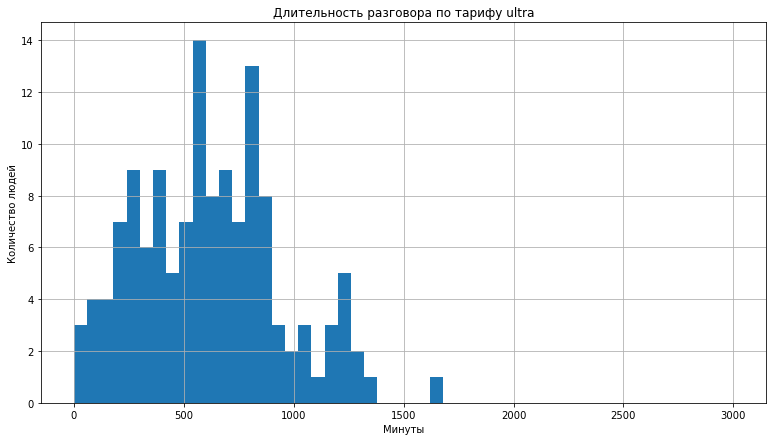

In [290]:
import matplotlib.pyplot as plt

pd.Series(minutes_user_ultra).hist(bins=50, figsize=(13, 7), range=(0, 3000))

plt.title('Длительность разговора по тарифу ultra')
plt.xlabel('Минуты')
plt.ylabel('Количество людей')

None

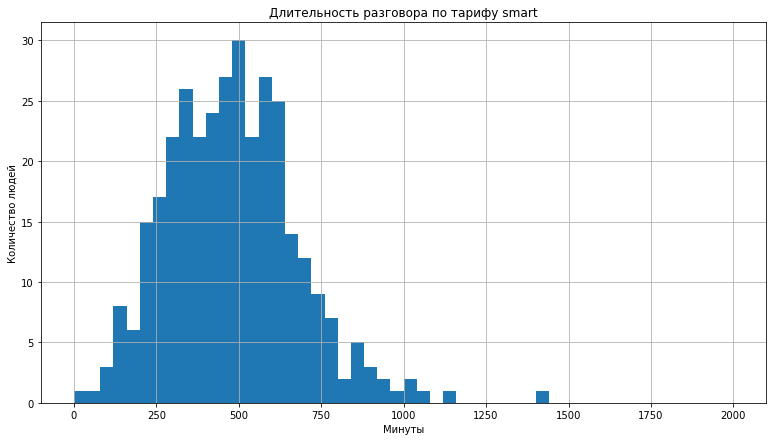

In [291]:
pd.Series(minutes_user_smart).hist(bins=50, figsize=(13, 7), range=(0, 2000))

plt.title('Длительность разговора по тарифу smart')
plt.xlabel('Минуты')
plt.ylabel('Количество людей')

None

Вверху на графиках представлено гамма-распределение.

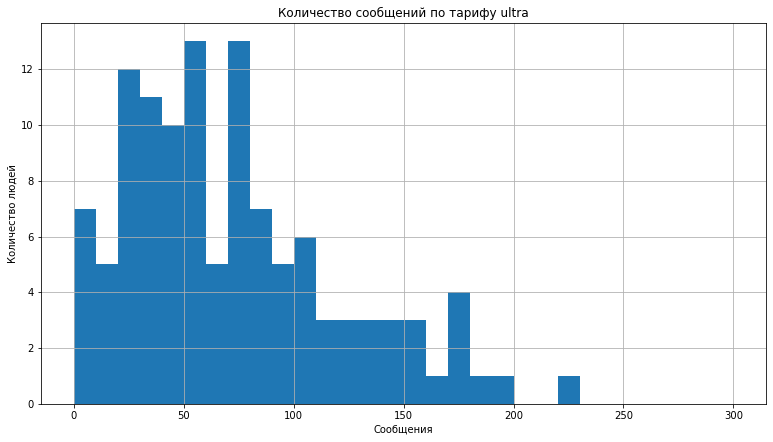

In [292]:
pd.Series(message_user_ultra).hist(bins=30, figsize=(13, 7), range=(0, 300))

plt.title('Количество сообщений по тарифу ultra')
plt.xlabel('Сообщения')
plt.ylabel('Количество людей')

None

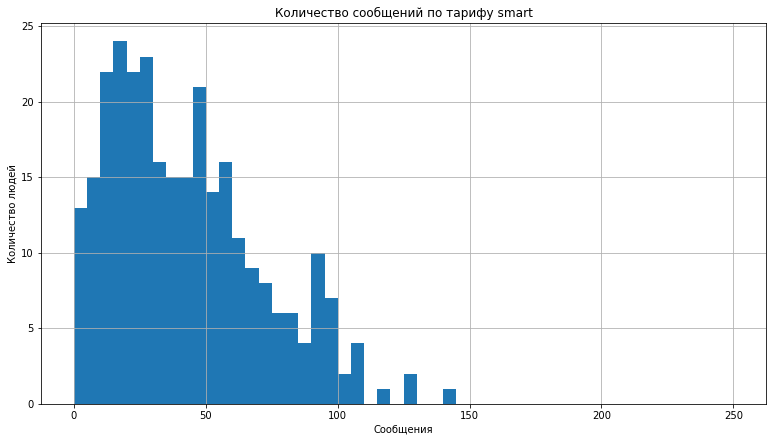

In [293]:
pd.Series(message_user_smart).hist(bins=50, figsize=(13, 7), range=(0, 250))

plt.title('Количество сообщений по тарифу smart')
plt.xlabel('Сообщения')
plt.ylabel('Количество людей')

None

Вверху на графиках представлено распределение хи-квадрат.

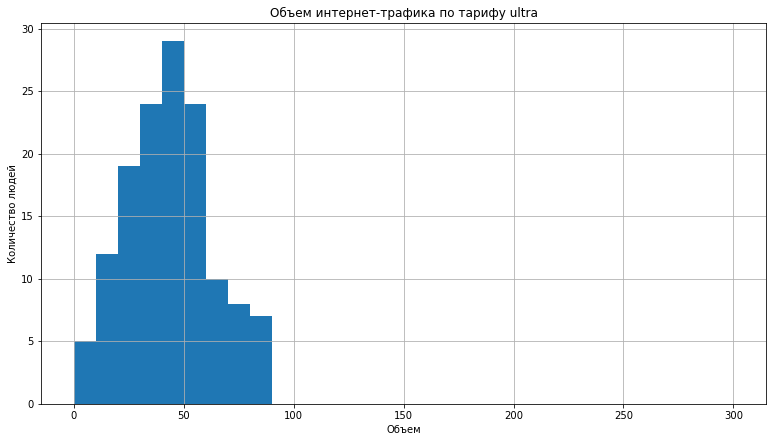

In [294]:
pd.Series(trafic_user_ultra).hist(bins=30, figsize=(13, 7), range=(0, 300))

plt.title('Объем интернет-трафика по тарифу ultra')
plt.xlabel('Объем')
plt.ylabel('Количество людей')

None

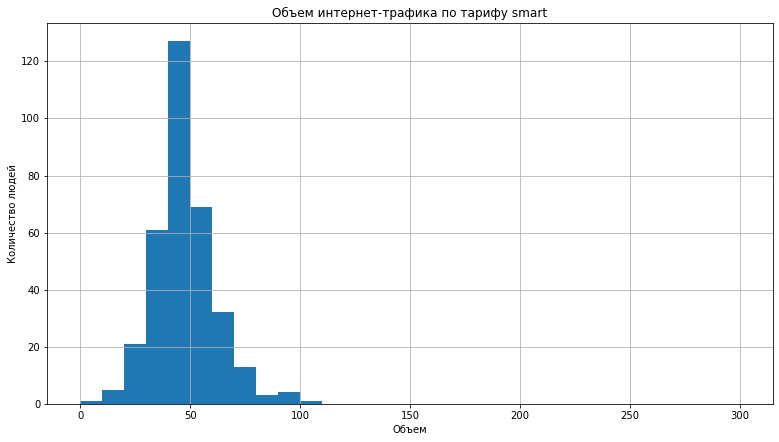

In [295]:
pd.Series(trafic_user_smart).hist(bins=30, figsize=(13, 7), range=(0, 300))

plt.title('Объем интернет-трафика по тарифу smart')
plt.xlabel('Объем')
plt.ylabel('Количество людей')

None

Вверху на графиках представлено нормальное распределение.

### 3.2 Вывод

Средний показатель количества израсходованных минут и сообщений больше у тарифа ultra. Средний объем интернет-трафика у тарифа smart немного выше, чем у тарифа ultra. Стандартное отклонение и дисперсия по всем показателям выше у тарифа ultra. 

## 4. Проверка гипотез

Пусть p - средняя выручка пользователей тарифа «Ультра», m - средняя выручка пользователей тарифа «Смарт». Сформулируем гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" таким образом:
 H0 - p=m;
 H1 - p≠m

In [296]:
#проверка 0-й гипотезы
ultra=[data_profit['summary'][j-1000] for j in data_users['user_id'] if data_users['tariff'][j-1000]=='ultra']
smart=[data_profit['summary'][j-1000] for j in data_users['user_id'] if data_users['tariff'][j-1000]=='smart']
hyp0=st.ttest_ind(ultra,smart)

In [297]:
#p-value 0-й гиоптезы
hyp0.pvalue 

0.0008139029928305526

Можно установить пороговое значени pvalue, как 5%. Значение pvalue показывает, что вероятность равенства двух показателей составляет меньше 0.1%. Это значит, что 0-я гипотеза не отвергается. Попробуем найти среднее значение тарифа ultra и сравнить с генеральной совокупностью тарифа smart.

In [298]:
ultra_mean=np.mean(ultra)
smart_mean=np.mean(smart)

In [299]:
hyp0=st.ttest_1samp(ultra,smart_mean)

In [300]:
hyp0.pvalue

4.685519194691705e-08

Вероятность такая же низкая.

In [301]:
#средние значения выручки разных тарифов
print(ultra_mean)
print(smart_mean)

35923.4899328859
42783.24501424501


Пусть p - средняя выручка пользователей из Москвы, m - средняя выручка пользователей из других регионов. Сформулируем гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" таким образом: H0 - p=m; H1 - p≠m

In [302]:
#проверка 0-й гипотезы
msk=[data_profit['summary'][j-1000] for j in data_users['user_id'] if data_users['city'][j-1000]=='Москва']
russia=[data_profit['summary'][j-1000] for j in data_users['user_id'] if data_users['city'][j-1000]!='Москва']
hyp0=st.ttest_ind(msk,russia)

In [303]:
#p-value 0-й гиоптезы
hyp0.pvalue

0.2979016593052777

Значение pvalue показывает, что вероятность равенства двух показателей составляет чуть меньше 30%. Это значит, что 0-я гипотеза отвергается.

### 4.1 Вывод

Средняя выручка пользователей тарифов 'Смарт' и 'Ультра' действительно отличаются. Гипотезу, что средняя выручка пользователей из Москвы отличается от пользователей из других регионов, удалось отвергнуть. 
Использовал метод ttest_1samp(), т.к. он проверят двустороннюю гипотезу.

## 5. Общий вывод

Средний показатель количества израсходованных минут и сообщений больше у тарифа ultra. Средний объем интернет-трафика у тарифа smart немного выше, чем у тарифа ultra. Среднее значение выручки тарифа smart выше, чем у тарифа ultra, а значит можно сделать вывод, что тариф smart приносит больше прибыли. Но тариф ultra выглядит более предпочтительнее для пользователей.